Images chargées : (2550, 64, 64)


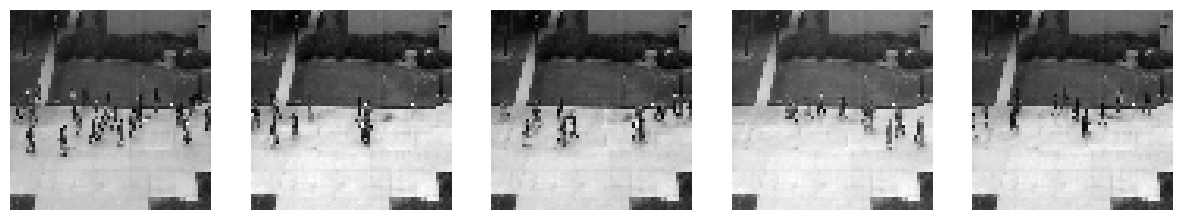

In [43]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
taille_image = (64, 64)
dossier_base = r"C:\Users\Ichrak\Desktop\Mission entreprise\UCSD_Anomaly_Dataset.v1p2\UCSDped2"
mode = "Train"
chemin_donnees = os.path.join(dossier_base, mode)

# Lister uniquement dossiers clips
clips = sorted([
    nom for nom in os.listdir(chemin_donnees)
    if os.path.isdir(os.path.join(chemin_donnees, nom))
])

def lire_image(chemin_image):
    if not chemin_image.lower().endswith(".tif"):
        return None
    img = cv2.imread(chemin_image, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Image introuvable ou corrompue :", chemin_image)
        return None
    img = cv2.resize(img, taille_image)
    img = img.astype('float32') / 255.0
    return img

# Charger et prétraiter
toutes_les_images = []
for clip in clips:
    chemin_clip = os.path.join(chemin_donnees, clip)
    images = sorted(os.listdir(chemin_clip))
    for nom_img in images:
        chemin_img = os.path.join(chemin_clip, nom_img)
        img = lire_image(chemin_img)
        if img is not None:
            toutes_les_images.append(img)

toutes_les_images = np.array(toutes_les_images)
print(f"Images chargées : {toutes_les_images.shape}")

# Visualisation de 5 images aléatoires
import random
plt.figure(figsize=(15,3))
for i in range(5):
    idx = random.randint(0, len(toutes_les_images)-1)
    plt.subplot(1,5,i+1)
    plt.imshow(toutes_les_images[idx], cmap='gray')
    plt.axis('off')
plt.show()


In [44]:
# Lister uniquement les dossiers clips
clips = sorted([
    nom for nom in os.listdir(chemin_donnees)
    if os.path.isdir(os.path.join(chemin_donnees, nom))
])

def lire_image(chemin_image):
    if not chemin_image.lower().endswith(".tif"):
        return None
    img = cv2.imread(chemin_image, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Image introuvable ou corrompue :", chemin_image)
        return None
    img = cv2.resize(img, taille_image)
    img = img.astype('float32') / 255.0  # Normalisation
    return img

# Charger et prétraiter toutes les images
toutes_les_images = []
for clip in clips:
    chemin_clip = os.path.join(chemin_donnees, clip)
    images = sorted(os.listdir(chemin_clip))
    for nom_img in images:
        chemin_img = os.path.join(chemin_clip, nom_img)
        img = lire_image(chemin_img)
        if img is not None:
            toutes_les_images.append(img)

toutes_les_images = np.array(toutes_les_images)
print(f"Nombre total d'images prétraitées : {toutes_les_images.shape}")


Nombre total d'images prétraitées : (2550, 64, 64)


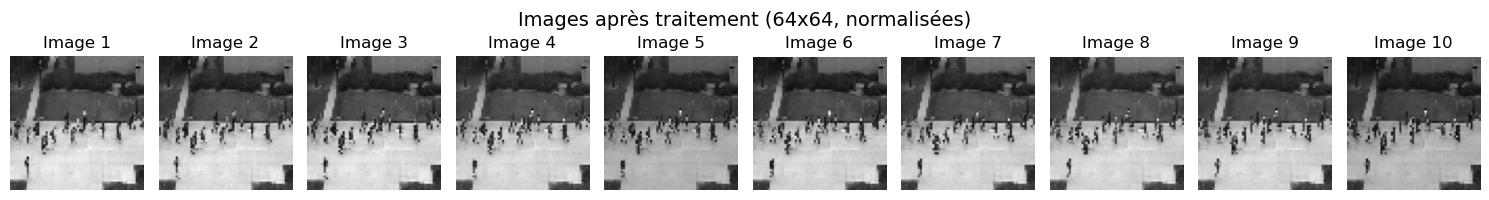

Processing terminé avec succès : images chargées, redimensionnées et normalisées.


In [46]:

# Afficher les 10 premières images
nb_afficher = 10
plt.figure(figsize=(15, 2))

for i in range(nb_afficher):
    plt.subplot(1, nb_afficher, i+1)
    plt.imshow(toutes_les_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Image {i+1}")

plt.suptitle("Images après traitement (64x64, normalisées)", fontsize=14)
plt.tight_layout()
plt.show()
print("Processing terminé avec succès : images chargées, redimensionnées et normalisées.")
